### Bonanzaa-LTER Gradient Soil Data File Merge

In [16]:

import numpy as np
import pandas as pd 
import datetime as dt

List of urls for EML Thaw Gradient Sites from 2004-2018

DOI: http://dx.doi.org/10.6073/pasta/29d79cf984929bc247173268c3785eca
Soil Temperature data measured at depths (10,20,30 and 40cm) in soil at the Eight Mile Lake (EML) permafrost thaw gradient site.This script is designed to read in, standardize and merge individual files into one final csv file containing all years (2004-2018). 

In [17]:
urls=["https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2004_2007.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2010_2013.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2013_2014.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2014_2015.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2015_2016.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2016_2017.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2017_2018.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2004_2009.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2010_2013.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2013_2014.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2014_2015.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2015_2016.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2016_2017.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2017_2018.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2004.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2008_2009.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2010_2013.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2013_2014.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2014_2015.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2016_2017.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2017_2018.csv"]

First read in each csv from the list above, call in each column name, and specify Na-values (-9999, NaN). This takes a moment to run since the datafiles are half hourly

In [19]:
dflist=[]
for i in range(len(urls)):
    df=pd.read_csv(urls[i]
          ,skiprows=1
            ,sep=","  
           , names=[
                    "site",     
                    "date",     
                    "year",     
                    "doy",     
                    "hour",     
                    "loc1_5cm",     
                    "loc1_10_cm",     
                    "loc1_20_cm",     
                    "loc1_30cm",     
                    "loc1_40cm",     
                    "empty1",     
                    "loc2_5cm",     
                    "loc2_10cm",     
                    "loc2_20cm",     
                    "loc2_30cm",     
                    "loc2_40cm",     
                    "empty2",     
                    "loc3_5cm",     
                    "loc3_10cm",     
                    "loc3_20cm",     
                    "loc3_30cm",     
                    "loc3_40cm"    ]
,na_values={
                  'loc1_5cm':[
                          '-9999',],
                  'loc1_10_cm':[
                          '-9999',],
                  'loc1_20_cm':[
                          '-9999',],
                  'loc1_30cm':[
                          '-9999',],
                  'loc1_40cm':[
                          '-9999',],
                  'loc2_5cm':[
                          '-9999',],
                  'loc2_10cm':[
                          '-9999',],
                  'loc2_20cm':[
                          '-9999',],
                  'loc2_30cm':[
                          '-9999',],
                  'loc2_40cm':[
                          '-9999',],
                  'loc3_5cm':[
                          '-9999',],
                  'loc3_10cm':[
                          '-9999',],
                  'loc3_20cm':[
                          '-9999',],
                  'loc3_30cm':[
                          '-9999',],
                  'loc3_40cm':[
                          '-9999',],} 
            
    )
    dflist.append(df)
  




To get summary of missing values within each dataset, get info

In [20]:
for k in dflist:
    print(k.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69707 entries, 0 to 69706
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   site        69707 non-null  object 
 1   date        69707 non-null  object 
 2   year        69707 non-null  int64  
 3   doy         69707 non-null  int64  
 4   hour        69707 non-null  int64  
 5   loc1_5cm    0 non-null      float64
 6   loc1_10_cm  64708 non-null  object 
 7   loc1_20_cm  64626 non-null  float64
 8   loc1_30cm   64708 non-null  float64
 9   loc1_40cm   64708 non-null  float64
 10  empty1      0 non-null      float64
 11  loc2_5cm    0 non-null      float64
 12  loc2_10cm   64582 non-null  float64
 13  loc2_20cm   64708 non-null  float64
 14  loc2_30cm   64708 non-null  float64
 15  loc2_40cm   64626 non-null  float64
 16  empty2      0 non-null      float64
 17  loc3_5cm    0 non-null      float64
 18  loc3_10cm   11904 non-null  float64
 19  loc3_20cm   64562 non-nul

Print a list of the site names available within each dataset to see if naming is uniform across each dataset

In [21]:
for l in dflist:
    print(l['site'].unique())

['EXT']
['EXT' nan]
['Ext']
['Ext']
['Extensive']
['Extensive']
['Extensive']
['min']
['min' nan]
['Min']
['Min']
['Minimal']
['Minimal']
['Minimal']
['mod']
['mod']
['mod' nan]
['Mod']
['Mod']
['Moderate']
['Moderate']


Site categories are not uniform, need to replace abbreviations in order to create uniform naming conventiona cross all datasets.Once labeling is unform, concatenate each dataframe

In [22]:
for e in dflist:
    e['site']=e['site'].replace({'EXT':'Extensive','Ext':'Extensive','min':'Minimal','Min':'Minimal'
                                ,'mod':'Moderate','Mod':'Moderate'})
    emldf=pd.concat(dflist)
   

emldf.head()

,site,date,year,doy,hour,loc1_5cm,loc1_10_cm,loc1_20_cm,loc1_30cm,loc1_40cm,...,loc2_10cm,loc2_20cm,loc2_30cm,loc2_40cm,empty2,loc3_5cm,loc3_10cm,loc3_20cm,loc3_30cm,loc3_40cm
0,Extensive,5/7/2004 10:00,2004,128,1000,NaN,2.56,0.046,-0.150,-0.304,...,1.922,0.080,-0.227,-0.398,NaN,NaN,NaN,NaN,-0.082,-0.244
1,Extensive,5/7/2004 12:00,2004,128,1200,NaN,2.434,-0.436,-0.611,-0.726,...,1.625,-0.350,-0.662,-0.816,NaN,NaN,NaN,NaN,-0.564,-0.692
2,Extensive,5/7/2004 14:00,2004,128,1400,NaN,2.502,-0.333,-0.517,-0.637,...,1.659,-0.218,-0.585,-0.731,NaN,NaN,NaN,NaN,-0.427,-0.581
3,Extensive,5/7/2004 16:00,2004,128,1600,NaN,2.403,-0.697,-0.851,-0.915,...,1.709,-0.441,-0.924,-1.010,NaN,NaN,NaN,NaN,-0.813,-0.911
4,Extensive,5/7/2004 18:00,2004,128,1800,NaN,2.39,-0.835,-0.942,-0.989,...,1.820,-0.484,-0.984,-1.036,NaN,NaN,NaN,NaN,-0.963,-1.014


Explore and visualise some of the values within each dataset..to ensure no values seem out of place

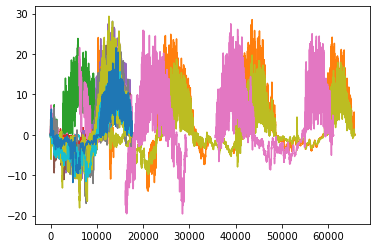

In [23]:
for j in dflist:
    j.loc1_5cm.plot()
    

Convert date to datetime format, extract hour from datetime and print .head() to check

In [24]:
emldf['date']=pd.to_datetime(emldf['date'])
emldf['hour']=emldf['date'].dt.time
emldf.head()

,site,date,year,doy,hour,loc1_5cm,loc1_10_cm,loc1_20_cm,loc1_30cm,loc1_40cm,...,loc2_10cm,loc2_20cm,loc2_30cm,loc2_40cm,empty2,loc3_5cm,loc3_10cm,loc3_20cm,loc3_30cm,loc3_40cm
0,Extensive,2004-05-07 10:00:00,2004,128,10:00:00,NaN,2.56,0.046,-0.150,-0.304,...,1.922,0.080,-0.227,-0.398,NaN,NaN,NaN,NaN,-0.082,-0.244
1,Extensive,2004-05-07 12:00:00,2004,128,12:00:00,NaN,2.434,-0.436,-0.611,-0.726,...,1.625,-0.350,-0.662,-0.816,NaN,NaN,NaN,NaN,-0.564,-0.692
2,Extensive,2004-05-07 14:00:00,2004,128,14:00:00,NaN,2.502,-0.333,-0.517,-0.637,...,1.659,-0.218,-0.585,-0.731,NaN,NaN,NaN,NaN,-0.427,-0.581
3,Extensive,2004-05-07 16:00:00,2004,128,16:00:00,NaN,2.403,-0.697,-0.851,-0.915,...,1.709,-0.441,-0.924,-1.010,NaN,NaN,NaN,NaN,-0.813,-0.911
4,Extensive,2004-05-07 18:00:00,2004,128,18:00:00,NaN,2.39,-0.835,-0.942,-0.989,...,1.820,-0.484,-0.984,-1.036,NaN,NaN,NaN,NaN,-0.963,-1.014


Columns (empty1 and empty2) contain no data values, therefore remove 

In [25]:
emldf = emldf.drop(columns=['empty1', 'empty2'])

Printout all unique years to ensure the dataset contains all datasets

In [26]:
emldf.year.unique()

array([2004, 2005, 2006, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2009], dtype=int64)

After cleaning,merging the data, and re-indexing, we can now export the final concatenated csv file which contains soil moisture data from 2004-2018

In [28]:
emldf.index = emldf['date']
#emldf.to_csv('AK_EML_LTER_GradientSoil_2004_2018.csv')